In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(777)
total_samples = 300 

In [3]:
data_dict = {
    'avg_spending': np.random.randn(total_samples) * 20 + 200,
    'purchase_frequency': np.random.randn(total_samples) * 5 + 15,
    'product_categories': np.random.randn(total_samples) * 2 + 8
}

df = pd.DataFrame(data_dict)
df['avg_spending_per_frequency'] = df['avg_spending'] / df['purchase_frequency']

In [4]:
df.sample(5)

,avg_spending,purchase_frequency,product_categories,avg_spending_per_frequency
286,207.705633,20.264777,5.614197,10.249589
2,198.692398,16.589080,10.779194,11.977301
79,208.074090,13.497546,10.456895,15.415698
279,215.062875,13.848152,10.182151,15.530078
268,208.805564,7.145120,6.380775,29.223521


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Number of clusters: 9


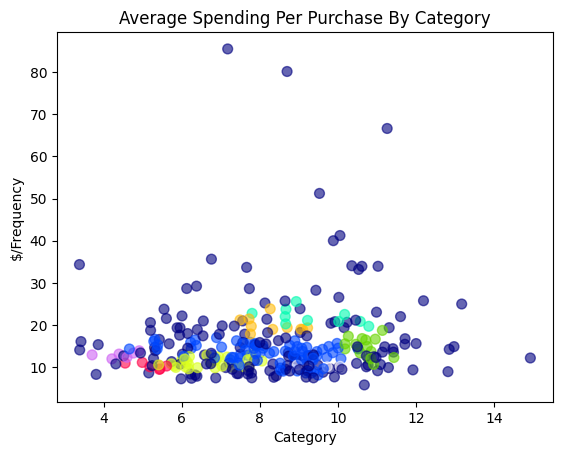

In [38]:
model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(df_scaled)
df['cluster'] = labels


labels = model.labels_
plt.scatter(df['product_categories'], df['avg_spending_per_frequency'], c=df['cluster'], cmap='gist_ncar', s=50, alpha=0.6)
plt.title('Average Spending Per Purchase By Category')
plt.ylabel('$/Frequency')
plt.xlabel('Category')

n = len(set(model.labels_))
print(f'Number of clusters: {n}')

plt.show()

The DBSCAN really should the best option to use (compared to K-Means) because the data is densed and it also showcases better the outliers.

It's possible to see the division of the clusters, even though they are pretty close to each other, to reconize the clients habits and patterns on their purchase's data. 